In [1]:
import numpy as np
import pandas as pd
from markov_chain import MarkovChain
from ring_construction import construct_transition_matrix_ring
from convergence_construction import construct_transition_matrix_converge

In [2]:
import logging
logging.basicConfig(level=logging.INFO)
seed = 2801

In [3]:
# Example usage
stationary_dist = np.array([26,11,11,9,9,7,7,5,5,4,4,2])*10
N = stationary_dist.sum()
prob_vector = stationary_dist/stationary_dist.sum()

P = construct_transition_matrix_ring(prob_vector,N, anchor=0,anchor_atraction=50,seed=seed)
# P = construct_transition_matrix_converge(prob_vector)

INFO:ring_partition:Attempt 1
INFO:ring_partition:Attempt 2
INFO:ring_partition:Attempt 3
INFO:ring_partition:Attempt 4
INFO:ring_partition:Attempt 5
INFO:ring_partition:Attempt 6
INFO:ring_partition:Attempt 7
INFO:ring_partition:Attempt 8
INFO:ring_partition:Attempt 9
INFO:ring_partition:Attempt 10
INFO:ring_partition:Attempt 11
INFO:ring_partition:Attempt 12
INFO:ring_partition:Attempt 13
INFO:ring_partition:Attempt 14
INFO:ring_partition:Attempt 15
INFO:ring_partition:Attempt 16
INFO:ring_partition:Attempt 17
INFO:ring_partition:Attempt 18
INFO:ring_partition:Attempt 19
INFO:ring_partition:Attempt 20
INFO:ring_partition:Attempt 21
INFO:ring_partition:Attempt 22
INFO:ring_partition:Attempt 23
INFO:ring_partition:Attempt 24
INFO:ring_partition:Attempt 25
INFO:ring_partition:Attempt 26
INFO:ring_partition:Attempt 27
INFO:ring_partition:Attempt 28
INFO:ring_partition:Attempt 29
INFO:ring_partition:Attempt 30
INFO:ring_partition:Attempt 31
INFO:ring_partition:Attempt 32
INFO:ring_partiti

In [4]:
# Verification
print("Transition matrix P:")
print(P)
print("Stationary distribution check (y @ P):")
print(np.max(np.abs(stationary_dist @ P - stationary_dist)))
print("Column sum check (P @ u):")
print(P @ np.ones(len(stationary_dist)))
mc = MarkovChain(P,np.arange(len(prob_vector)))

Transition matrix P:
[[0.         0.05384615 0.25384615 0.03461538 0.18461538 0.03846154
  0.14615385 0.03076923 0.13076923 0.01153846 0.10384615 0.01153846]
 [0.40909091 0.         0.06363636 0.16363636 0.05454545 0.08181818
  0.04545455 0.05454545 0.00909091 0.06363636 0.00909091 0.04545455]
 [0.30909091 0.13636364 0.         0.15454545 0.03636364 0.1
  0.05454545 0.08181818 0.00909091 0.03636364 0.03636364 0.04545455]
 [0.35555556 0.15555556 0.05555556 0.         0.11111111 0.1
  0.08888889 0.05555556 0.01111111 0.05555556 0.01111111 0.        ]
 [0.34444444 0.12222222 0.06666667 0.07777778 0.         0.18888889
  0.01111111 0.06666667 0.04444444 0.03333333 0.02222222 0.02222222]
 [0.37142857 0.21428571 0.02857143 0.11428571 0.05714286 0.
  0.05714286 0.01428571 0.02857143 0.08571429 0.01428571 0.01428571]
 [0.27142857 0.2        0.14285714 0.11428571 0.02857143 0.05714286
  0.         0.02857143 0.02857143 0.07142857 0.02857143 0.02857143]
 [0.36       0.14       0.06       0.14   

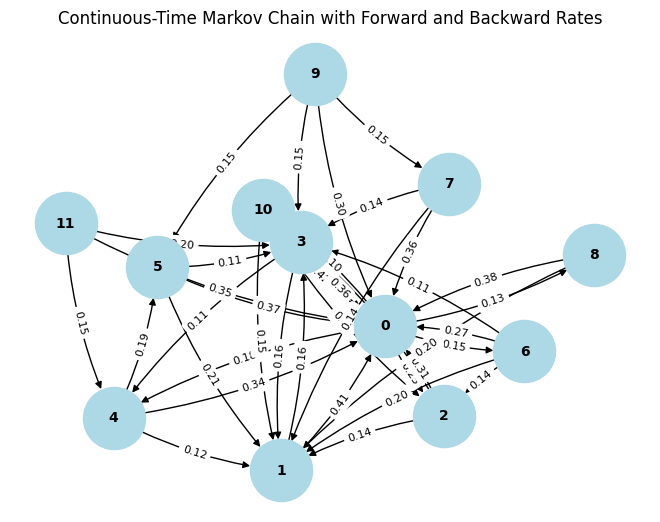

In [5]:
mc.plot(th=0.1)

In [6]:
occur_statistic_df = pd.DataFrame(index=mc.states)
occur_statistic_df["occur_after"] = mc.occur_after_anchor(0)
occur_statistic_df["occur_before"] = mc.occur_before_anchor(0)
occur_statistic_df

,occur_after,occur_before
0,0.000,0.000
1,0.014,0.045
2,0.066,0.034
3,0.009,0.032
4,0.048,0.031
5,0.010,0.026
6,0.038,0.019
7,0.008,0.018
8,0.034,0.019
9,0.003,0.012


## create a statistic

In [39]:
seq_len = 1000
seq = mc.sample(seq_len, seed=seed)

In [40]:
frequencies = {state:0 for state in mc.states}
for state in seq:
    frequencies[state] += 1
    
anchor = mc.states[0]
after_anchor_frequencies = {state:0 for state in mc.states}
for i in range(seq_len-1):
    if seq[i] == anchor:
        after_anchor_frequencies[seq[i+1]] += 1

In [41]:
seq_df = pd.DataFrame(index=mc.states)
seq_df['frequncies'] = seq_df.index.map(frequencies)
seq_df['after_anchor_frequencies'] = seq_df.index.map(after_anchor_frequencies)
seq_df

,frequncies,after_anchor_frequencies
0,253,0
1,115,7
2,120,76
3,87,7
4,85,37
5,88,18
6,66,44
7,47,4
8,55,39
9,38,1
